# **Automate emotion analysis of textual comments and feedback**





---



---
**Name Of The Student** : Ekta Tripathi

**Internship Project Topic** : Automate emotion analysis of textual comments and feedback

**Name of the Organization** : TCS iON

**Name of the Industry Mentor** : Himdweep Walia

**Name of the Institute** : B.K. Birla College of Arts, Science & Commerce (Autonomous)



---



---
# **Introduction**
The project "Automate Emotion Analysis of Textual Comments and Feedback" focuses on harnessing deep learning algorithms, specifically Bidirectional Long Short-Term Memory (BiLSTM) layers, to decipher emotional tones and sentiments conveyed within textual data. By utilizing advanced Natural Language Processing (NLP) techniques, the system aims to revolutionize how emotions are understood and analyzed from written feedback and comments.

We can break the implementation into following steps:

1) Collecting Dataset

2) Text Preprocessing

3) Feature Extraction

4) Model Development

5) Evaluation

# **Dataset**
For this project I have used HuggingFace Emotion dataset. Emotion is a dataset of English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise. The dataset comprises two columns, namely 'text' and 'label.' The 'text' column contains strings consisting of tweets from different users, while the 'label' column consists of categorical values representing emotions. These emotions include sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).

[https://huggingface.co/datasets/dair-ai/emotion](https://huggingface.co/datasets/dair-ai/emotion)


# Importing necessary packages

In [ ]:
!pip install nlp
!pip install datasets
import tensorflow as tf
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nlp
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Flatten
from keras.layers import Bidirectional
from keras.callbacks import EarlyStopping
from keras.layers import GlobalAvgPool1D
import random


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 11.1 MB/s eta 0:00:00


## The datasets library from Hugging Face provides easy access to a wide range of datasets that are commonly used for NLP tasks. It offers functionalities to download, preprocess, and work with datasets seamlessly, allowing users to load datasets easily into their machine learning or deep learning pipelines.

In [ ]:
pip install dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.22
    Uninstalling SQLAlchemy-2.0.22:
      Successfully uninstalled SQLAlchemy-2.0.22
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.49 which is incompatible.


# Importing the Dataset

In [ ]:
from datasets import load_dataset
data = load_dataset('emotion')

# Converting the train, validation and test datasets into DataFrame format
train = pd.DataFrame(data['train'])
validation = pd.DataFrame(data['validation'])
test = pd.DataFrame(data['test'])

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
train.head(10)

text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3
5  ive been feeling a little burdened lately wasn...      0
6  ive been taking or milligrams or times recomme...      5
7  i feel as confused about life as a teenager or...      4
8  i have been with petronas for years i feel tha...      1
9                                i feel romantic too      2

In [ ]:
train['label'].unique()

array([0, 3, 2, 5, 4, 1])

# Distribution of the Length of the Texts

In [ ]:
train['length_of_text'] = [len(i.split(' ')) for i in train['text']]

fig = px.histogram(train['length_of_text'], marginal='box',
                   labels={"value": "Length of the Text"})

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Length of the Texts',
                  title_x=0.5, title_font=dict(size=22))
fig.show()

# Distribution of the Length of the Texts by Emotions

In [ ]:
fig = px.histogram(train['length_of_text'], marginal='box',
                   labels={"value": "Length of the Text"},
                   color=train['label'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Length of the Texts by Emotions',
                  title_x=0.5, title_font=dict(size=22))
fig.show()

# Distribution of the Labels

In [ ]:
fig = px.histogram(train, x='label', color='label')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Labels',
                  title_x=0.5, title_font=dict(size=22))
fig.show()

In [ ]:
FreqOfWords = train['text'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Frequency of the Words in the Train Dataset',
                  title_x=0.5, title_font=dict(size=22)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

# Tokenizing with NLTK

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def tokenization(inputs):
    return word_tokenize(inputs) #REFERENCE[1]


train['text_tokenized'] = train['text'].apply(tokenization)
validation['text_tokenized'] = validation['text'].apply(tokenization)

In [ ]:
train.head()

text  label  \
0                            i didnt feel humiliated      0   
1  i can go from feeling so hopeless to so damned...      0   
2   im grabbing a minute to post i feel greedy wrong      3   
3  i am ever feeling nostalgic about the fireplac...      2   
4                               i am feeling grouchy      3   

                                      text_tokenized  
0                       [i, didnt, feel, humiliated]  
1  [i, can, go, from, feeling, so, hopeless, to, ...  
2  [im, grabbing, a, minute, to, post, i, feel, g...  
3  [i, am, ever, feeling, nostalgic, about, the, ...  
4                          [i, am, feeling, grouchy]

# Stopwords Removal

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

def stopwords_remove(inputs):
    return [item for item in inputs if item not in stop_words]

train['text_stop'] = train['text_tokenized'].apply(stopwords_remove)
validation['text_stop'] = validation['text_tokenized'].apply(stopwords_remove)

train.head()

text  label  \
0                            i didnt feel humiliated      0   
1  i can go from feeling so hopeless to so damned...      0   
2   im grabbing a minute to post i feel greedy wrong      3   
3  i am ever feeling nostalgic about the fireplac...      2   
4                               i am feeling grouchy      3   

                                      text_tokenized  \
0                       [i, didnt, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [im, grabbing, a, minute, to, post, i, feel, g...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                           text_stop  
0                          [didnt, feel, humiliated]  
1  [go, feeling, hopeless, damned, hopeful, aroun...  
2  [im, grabbing, minute, post, feel, greedy, wrong]  
3  [ever, feeling, nostalgic, fireplace, know, st...  
4                                 [feeling, grouchy]

# Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatization(inputs):
    return [lemmatizer.lemmatize(word=x, pos='v') for x in inputs]

train['text_lemmatized'] = train['text_stop'].apply(lemmatization)
validation['text_lemmatized'] = validation['text_stop'].apply(lemmatization)

train.head()

text  label  \
0                            i didnt feel humiliated      0   
1  i can go from feeling so hopeless to so damned...      0   
2   im grabbing a minute to post i feel greedy wrong      3   
3  i am ever feeling nostalgic about the fireplac...      2   
4                               i am feeling grouchy      3   

                                      text_tokenized  \
0                       [i, didnt, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [im, grabbing, a, minute, to, post, i, feel, g...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                           text_stop  \
0                          [didnt, feel, humiliated]   
1  [go, feeling, hopeless, damned, hopeful, aroun...   
2  [im, grabbing, minute, post, feel, greedy, wrong]   
3  [ever, feeling, nostalgic, fireplace, know, st...   
4                                 [feeling, grouchy]   

                                     text_lemmatized  
0                           [didnt, feel, humiliate]  
1  [go, feel, hopeless, damn, hopeful, around, so...  
2      [im, grab, minute, post, feel, greedy, wrong]  
3  [ever, feel, nostalgic, fireplace, know, still...  
4                                    [feel, grouchy]

# Joining Tokens into Sentences

In [ ]:
train['text_cleaned'] = train['text_lemmatized'].str.join(' ')
validation['text_cleaned'] = validation['text_lemmatized'].str.join(' ')

train.head() # Final form of the dataset

text  label  \
0                            i didnt feel humiliated      0   
1  i can go from feeling so hopeless to so damned...      0   
2   im grabbing a minute to post i feel greedy wrong      3   
3  i am ever feeling nostalgic about the fireplac...      2   
4                               i am feeling grouchy      3   

                                      text_tokenized  \
0                       [i, didnt, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [im, grabbing, a, minute, to, post, i, feel, g...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                           text_stop  \
0                          [didnt, feel, humiliated]   
1  [go, feeling, hopeless, damned, hopeful, aroun...   
2  [im, grabbing, minute, post, feel, greedy, wrong]   
3  [ever, feeling, nostalgic, fireplace, know, st...   
4                                 [feeling, grouchy]   

                                     text_lemmatized  \
0                           [didnt, feel, humiliate]   
1  [go, feel, hopeless, damn, hopeful, around, so...   
2      [im, grab, minute, post, feel, greedy, wrong]   
3  [ever, feel, nostalgic, fireplace, know, still...   
4                                    [feel, grouchy]   

                                        text_cleaned  
0                               didnt feel humiliate  
1  go feel hopeless damn hopeful around someone c...  
2              im grab minute post feel greedy wrong  
3  ever feel nostalgic fireplace know still property  
4                                       feel grouchy

# WordCloud of the Cleaned Dataset

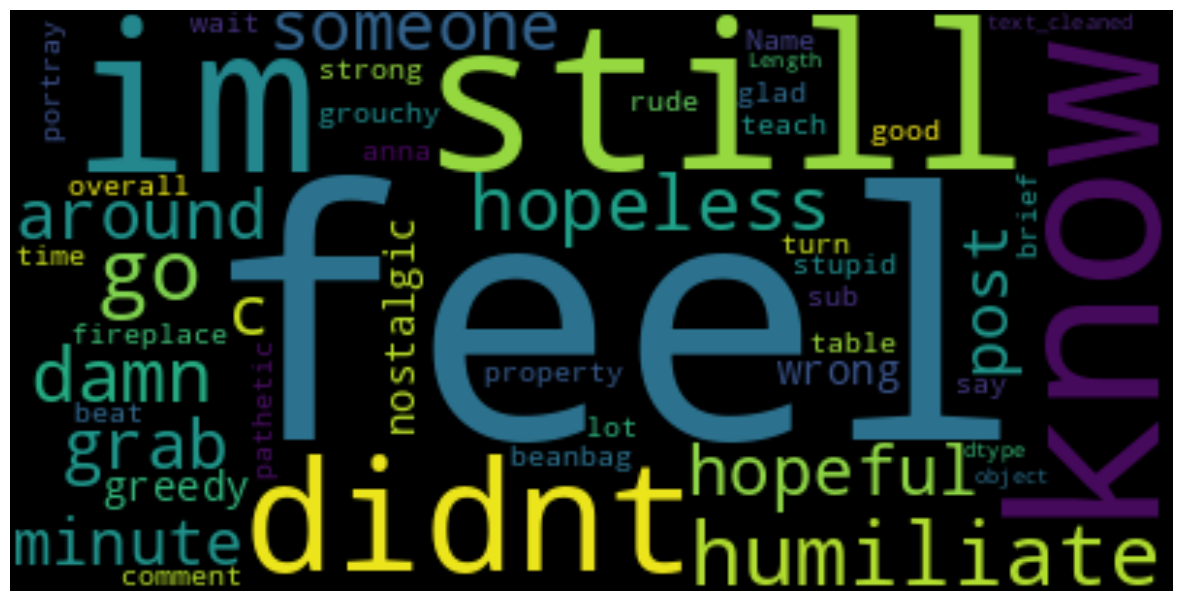

In [ ]:
WordCloud = WordCloud(max_words=100,
                      random_state=30,
                      collocations=True).generate(str((train['text_cleaned'])))

plt.figure(figsize=(15, 8))
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Tokenizing with Tensorflow

In [ ]:
num_words = 10000
tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train['text_cleaned'])

word_index = tokenizer.word_index
# print(word_index)

In [ ]:
num_words = 10000
tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train['text_cleaned'])

word_index = tokenizer.word_index
# print(word_index)

In [ ]:
Tokenized_train = tokenizer.texts_to_sequences(train['text_cleaned'])
Tokenized_val = tokenizer.texts_to_sequences(validation['text_cleaned'])

In [ ]:
print('Non-tokenized Version: ', train['text_cleaned'][0])
print('Tokenized Version: ', tokenizer.texts_to_sequences([train['text_cleaned'][0]]))
print('--'*50)
print('Non-tokenized Version: ', train['text_cleaned'][10])
print('Tokenized Version: ', tokenizer.texts_to_sequences([train['text_cleaned'][10]]))
print('--'*50)
print('Non-tokenized Version: ', train['text'][100])
print('Tokenized Version: ', tokenizer.texts_to_sequences([train['text_cleaned'][100]]))

Non-tokenized Version:  didnt feel humiliate
Tokenized Version:  [[56, 2, 559]]
----------------------------------------------------------------------------------------------------
Non-tokenized Version:  feel like make suffer see mean something
Tokenized Version:  [[2, 3, 6, 393, 31, 102, 25]]
----------------------------------------------------------------------------------------------------
Non-tokenized Version:  i wont let me child cry it out because i feel that loving her and lily when she was little was going to be opportunities that only lasted for those short few months
Tokenized Version:  [[356, 82, 289, 230, 2, 14, 3422, 13, 7, 2310, 87, 742, 263]]


# Padding

In [ ]:
maxlen = 40
Padded_train = pad_sequences(Tokenized_train, maxlen=maxlen, padding='pre')
Padded_val = pad_sequences(Tokenized_val, maxlen=maxlen, padding='pre')

print('Non-padded Version: ', tokenizer.texts_to_sequences([train['text_cleaned'][0]]))
print('Padded Version: ', Padded_train[0])
print('--'*50)
print('Non-padded Version: ', tokenizer.texts_to_sequences([train['text_cleaned'][10]]))
print('Padded Version: ', Padded_train[10])

Non-padded Version:  [[56, 2, 559]]
Padded Version:  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  56   2 559]
----------------------------------------------------------------------------------------------------
Non-padded Version:  [[2, 3, 6, 393, 31, 102, 25]]
Padded Version:  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   3   6
 393  31 102  25]


# Creating the Model

In [ ]:
model = Sequential()

model.add(Embedding(num_words, 16, input_length=maxlen))
model.add(GlobalAvgPool1D())

tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True, activation='relu'))
model.add(Dropout(0.3))

tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(40, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(40, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 16)            160000    
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 102       
                                                      

# Training the Model

In [ ]:
label_ = {"sadness": 0, "joy": 1, "love": 2, "anger": 3, "fear": 4, "surprise": 5}
train['label'] = train['label'].replace(label_)
validation['label'] = validation['label'].replace(label_)

train.head()

text  label  \
0                            i didnt feel humiliated      0   
1  i can go from feeling so hopeless to so damned...      0   
2   im grabbing a minute to post i feel greedy wrong      3   
3  i am ever feeling nostalgic about the fireplac...      2   
4                               i am feeling grouchy      3   

                                      text_tokenized  \
0                       [i, didnt, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [im, grabbing, a, minute, to, post, i, feel, g...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                           text_stop  \
0                          [didnt, feel, humiliated]   
1  [go, feeling, hopeless, damned, hopeful, aroun...   
2  [im, grabbing, minute, post, feel, greedy, wrong]   
3  [ever, feeling, nostalgic, fireplace, know, st...   
4                                 [feeling, grouchy]   

                                     text_lemmatized  \
0                           [didnt, feel, humiliate]   
1  [go, feel, hopeless, damn, hopeful, around, so...   
2      [im, grab, minute, post, feel, greedy, wrong]   
3  [ever, feel, nostalgic, fireplace, know, still...   
4                                    [feel, grouchy]   

                                        text_cleaned  
0                               didnt feel humiliate  
1  go feel hopeless damn hopeful around someone c...  
2              im grab minute post feel greedy wrong  
3  ever feel nostalgic fireplace know still property  
4                                       feel grouchy

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='auto', patience=5,
                                                 restore_best_weights=True)

epochs = 100
hist = model.fit(Padded_train, train['label'], epochs=epochs,
                 validation_data=(Padded_val, validation['label']),
                 callbacks=[early_stopping])

Epoch 1/100
500/500 [==============================] - 5s 7ms/step - loss: 1.6351 - accuracy: 0.3289 - val_loss: 1.5721 - val_accuracy: 0.3520
Epoch 2/100
500/500 [==============================] - 3s 7ms/step - loss: 1.5778 - accuracy: 0.3451 - val_loss: 1.5615 - val_accuracy: 0.3520
Epoch 3/100
500/500 [==============================] - 6s 11ms/step - loss: 1.5586 - accuracy: 0.3664 - val_loss: 1.5451 - val_accuracy: 0.3650
Epoch 4/100
500/500 [==============================] - 6s 11ms/step - loss: 1.5324 - accuracy: 0.4040 - val_loss: 1.5195 - val_accuracy: 0.4880
Epoch 5/100
500/500 [==============================] - 4s 9ms/step - loss: 1.4946 - accuracy: 0.4583 - val_loss: 1.4808 - val_accuracy: 0.5625
Epoch 6/100
500/500 [==============================] - 4s 7ms/step - loss: 1.4440 - accuracy: 0.5109 - val_loss: 1.4252 - val_accuracy: 0.5855
Epoch 7/100
500/500 [==============================] - 7s 13ms/step - loss: 1.3731 - accuracy: 0.5543 - val_loss: 1.3551 - val_accuracy: 0.5

# Train and Validation Loss Graphs

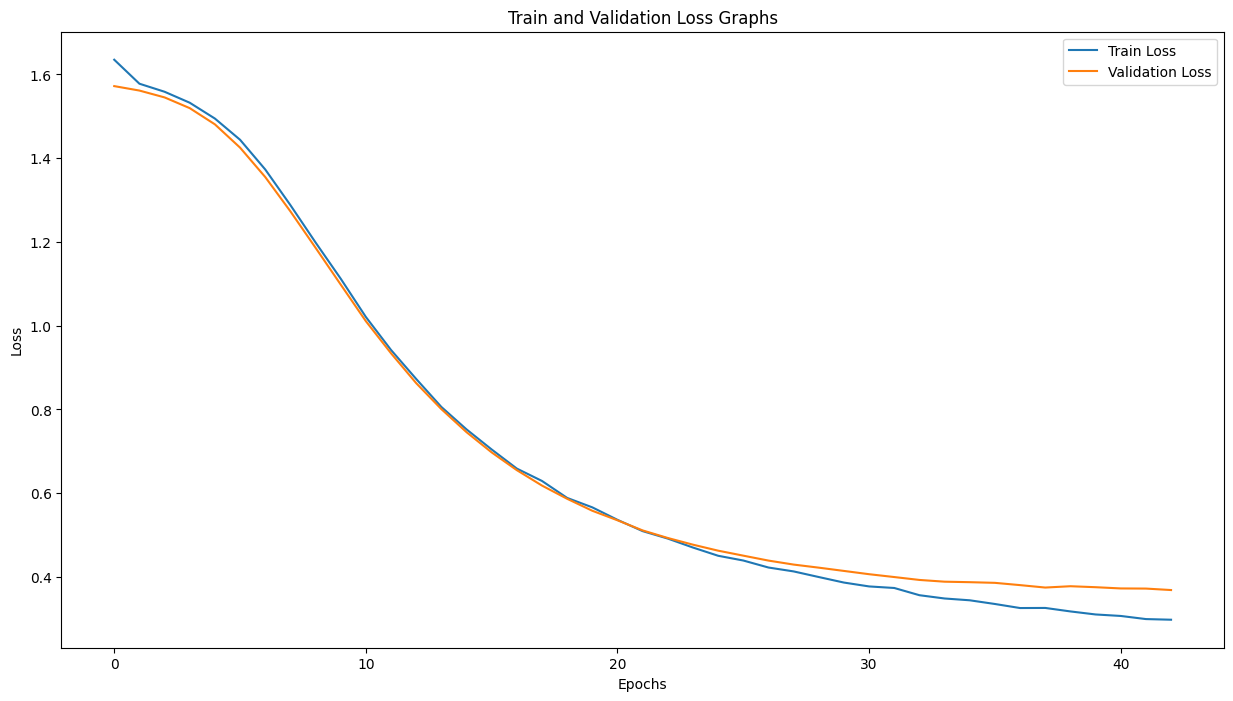

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss Graphs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Preparing the Test Data

In [ ]:
test['text_tokenized'] = test['text'].apply(tokenization)
test['text_stop'] = test['text_tokenized'].apply(stopwords_remove)
test['text_lemmatized'] = test['text_stop'].apply(lemmatization)
test['text_cleaned'] = test['text_lemmatized'].str.join(' ')

Tokenized_test = tokenizer.texts_to_sequences(test['text_cleaned'])
Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='pre')

test['label'] = test['label'].replace(label_)

test_evaluate = model.evaluate(Padded_test, test['label'])

63/63 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8750


In [ ]:
test.head()

text  label  \
0  im feeling rather rotten so im not very ambiti...      0   
1          im updating my blog because i feel shitty      0   
2  i never make her separate from me because i do...      0   
3  i left with my bouquet of red and yellow tulip...      1   
4    i was feeling a little vain when i did this one      0   

                                      text_tokenized  \
0  [im, feeling, rather, rotten, so, im, not, ver...   
1  [im, updating, my, blog, because, i, feel, shi...   
2  [i, never, make, her, separate, from, me, beca...   
3  [i, left, with, my, bouquet, of, red, and, yel...   
4  [i, was, feeling, a, little, vain, when, i, di...   

                                           text_stop  \
0  [im, feeling, rather, rotten, im, ambitious, r...   
1                 [im, updating, blog, feel, shitty]   
2  [never, make, separate, ever, want, feel, like...   
3  [left, bouquet, red, yellow, tulips, arm, feel...   
4                       [feeling, little, vain, one]   

                                     text_lemmatized  \
0   [im, feel, rather, rotten, im, ambitious, right]   
1                   [im, update, blog, feel, shitty]   
2  [never, make, separate, ever, want, feel, like...   
3  [leave, bouquet, red, yellow, tulips, arm, fee...   
4                          [feel, little, vain, one]   

                                        text_cleaned  
0           im feel rather rotten im ambitious right  
1                         im update blog feel shitty  
2    never make separate ever want feel like ashamed  
3  leave bouquet red yellow tulips arm feel sligh...  
4                               feel little vain one

# Making Predictions in the Test Data

In [ ]:
def make_predictions(text_input):
    text_input = str(text_input)
    text_input = tokenization(text_input)
    text_input = stopwords_remove(text_input)
    text_input = lemmatization(text_input)
    text_input = ' '.join(text_input)
    text_input = tokenizer.texts_to_sequences([text_input])
    text_input = pad_sequences(text_input, maxlen=maxlen, padding='pre')
    text_input = np.argmax(model.predict(text_input))

    if text_input == 0:
        print('Predicted Emotion: Sadness')
    elif text_input == 1:
        print('Predicted Emotion: Joy')
    elif text_input == 2:
        print('Predicted Emotion: Love')
    elif text_input == 3:
        print('Predicted Emotion: Anger')
    elif text_input == 4:
        print('Predicted Emotion: Fear')
    else:
        print('Predicted Emotion: Surprise')
    return text_input

label_ = {0: "Sadness", 1: "Joy", 2: "Love", 3: "Anger", 4: "Fear", 5: "Surprise"}
test['label'] = test['label'].replace(label_)

# Randomly chosen Test Dataset data points
i = random.randint(0, len(test) - 1)

print('Test Text:', test['text'][i])
print(' ')
print('Actual Emotion:', test['label'][i])
make_predictions(test['text'][i])
print('-'*50)
print('Test Text:', test['text'][i+1])
print(' ')
print('Actual Emotion:', test['label'][i+1])
make_predictions(test['text'][i+1])

Test Text: i feel embarrassed for not having lost weight again and im afraid that another week of disappointing news at the scale will cause people to give up on me and stop following the blog
 
Actual Emotion: Sadness
1/1 [==============================] - 0s 138ms/step
Predicted Emotion: Sadness
--------------------------------------------------
Test Text: i feel a little guilty that i am not doing the same and as i contemplate going back to get some money the prisoners begin to enter the room
 
Actual Emotion: Sadness
1/1 [==============================] - 0s 32ms/step
Predicted Emotion: Sadness


0

# Confusion Matrix of the Test Data

63/63 [==============================] - 0s 2ms/step


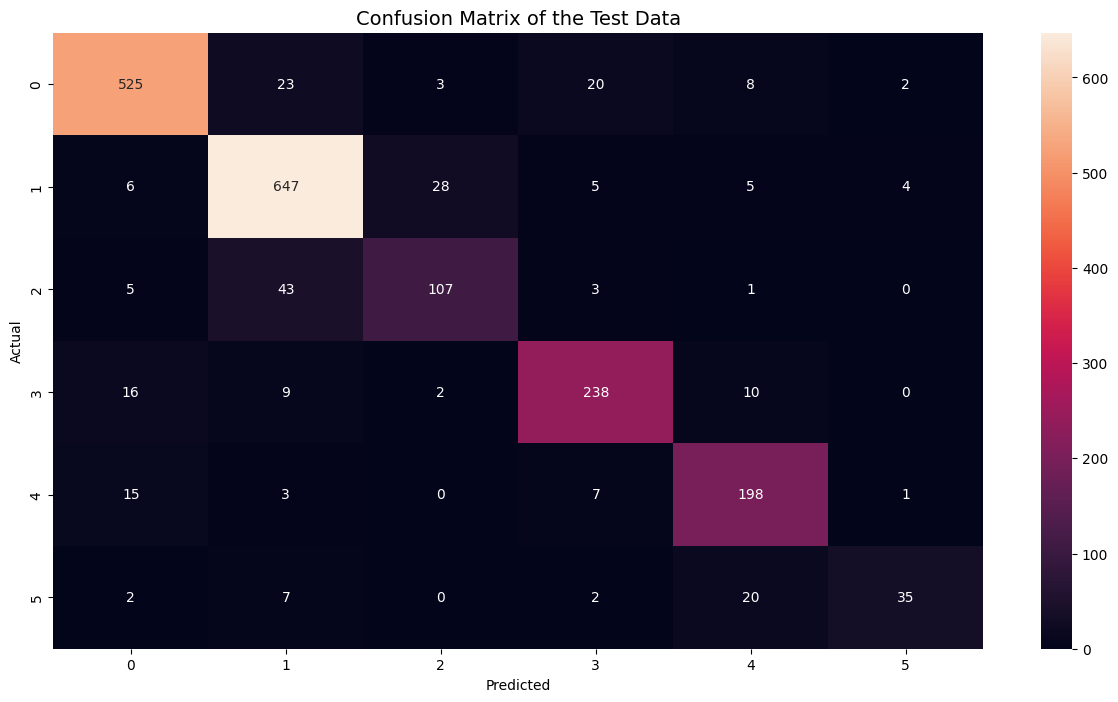

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

label_ = {"Sadness": 0, "Joy": 1, "Love": 2, "Anger": 3, "Fear": 4, "Surprise": 5}
test['label'] = test['label'].replace(label_)

predictions = model.predict(Padded_test)
pred = np.argmax(predictions, axis=1)

# pred = model.predict_classes(Padded_test)
plt.figure(figsize=(15, 8))
conf_mat = confusion_matrix(test['label'].values, pred)
conf_mat = pd.DataFrame(conf_mat, columns=np.unique(test['label']), index=np.unique(pred))
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.title('Confusion Matrix of the Test Data', fontsize=14)
plt.show()

In [ ]:
make_predictions('No one told you when to run, you missed the starting gun')

1/1 [==============================] - 0s 36ms/step
Predicted Emotion: Sadness


0

In [ ]:
make_predictions("I just asked one question to confirm his request, and my boss bit my head off.")

1/1 [==============================] - 0s 25ms/step
Predicted Emotion: Anger


3

In [ ]:
make_predictions("She’s flying high after the successful product launch.")

1/1 [==============================] - 0s 21ms/step
Predicted Emotion: Joy


1

In [ ]:
make_predictions("I’m going to have the first meeting with a big client tomorrow, and I’m feeling butterflies in my stomach")

1/1 [==============================] - 0s 23ms/step
Predicted Emotion: Love


2

In [ ]:
make_predictions("Sometimes the people who appear to be the most confident are actually afraid of their own shadows.")

1/1 [==============================] - 0s 38ms/step
Predicted Emotion: Fear


4

In [ ]:
make_predictions("I'm really impressed that Ashley can speak 7 languages, whereas I only speak one!")

1/1 [==============================] - 0s 22ms/step
Predicted Emotion: Surprise


5

## In this code, we used Python along with TensorFlow, NLTK, and Hugging Face's datasets library to work with text data and build a deep learning model for emotion analysis. We preprocessed text, visualized data distributions, constructed a Bidirectional LSTM model, trained it on the provided dataset, and evaluated its performance. The model aimed to predict emotions such as sadness, joy, love, anger, fear, and surprise based on textual input. Using these tools and techniques, we successfully created a system that learns from text to predict emotions, allowing potential applications in understanding sentiments expressed in text data across various domains